# Estadística Aplicada
Sesión 10 - 6 septiembre

Patricio Ruiz Rodriguez  1897914    Gpo. 41

In [1]:
## Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [3]:
## Importar datos
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [4]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [6]:
exponen = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [9]:
exponen.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Función Riesgo de la Exponencial')

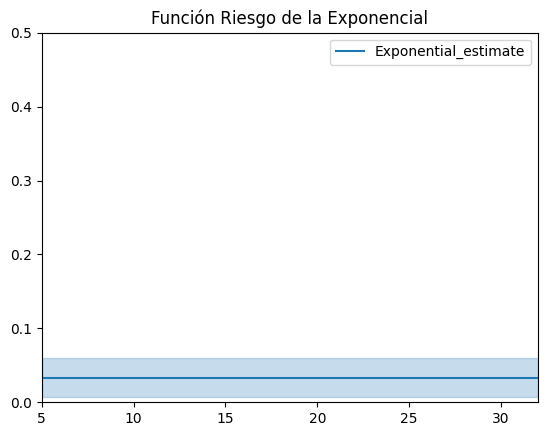

In [11]:
exponen.plot_hazard()
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.title('Función Riesgo de la Exponencial')

(5.0, 32.0)

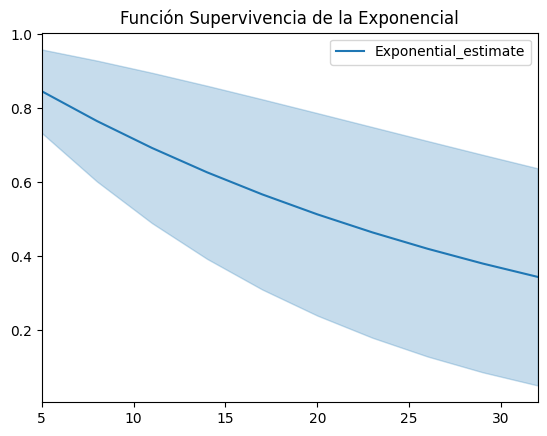

In [12]:
exponen.plot_survival_function()
plt.title('Función Supervivencia de la Exponencial')
plt.xlim(5,32)

(5.0, 32.0)

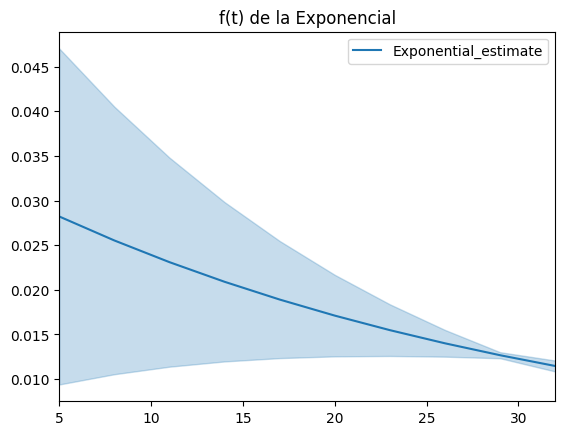

In [27]:
mint = recaida[' tiempo'].min()
maxt = recaida[' tiempo'].max()
exponen.plot_density()
plt.title('f(t) de la Exponencial')
plt.xlim(mint, maxt)

# Weibull

Suponiendo que el tiempo de superviviencia se distribuye Weibull

In [20]:
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [21]:
## Gamma de Weibull
mweibull.rho_

1.8867259500116444

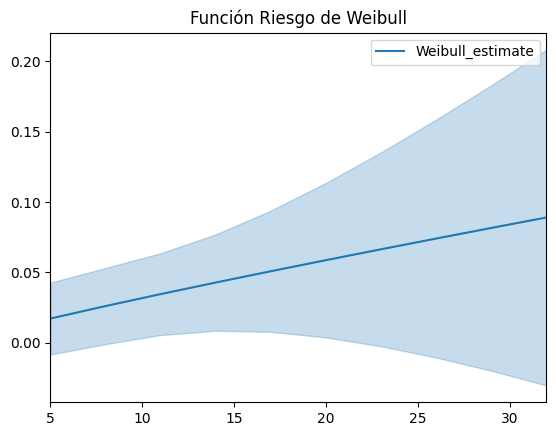

In [32]:
## h(t)
mweibull.plot_hazard()
plt.title('Función Riesgo de Weibull')
plt.xlim(mint, maxt);

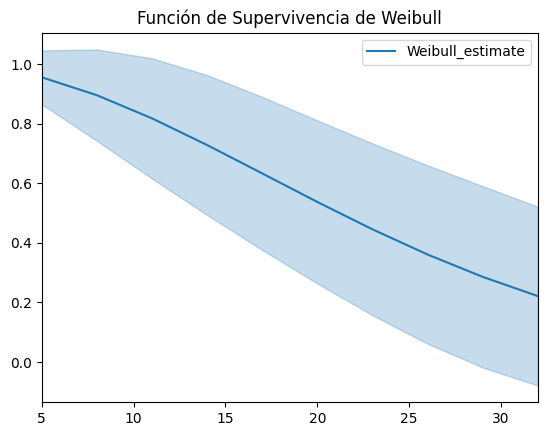

In [30]:
## s(t)
mweibull.plot_survival_function()
plt.title('Función de Supervivencia de Weibull')
plt.xlim(mint, maxt);

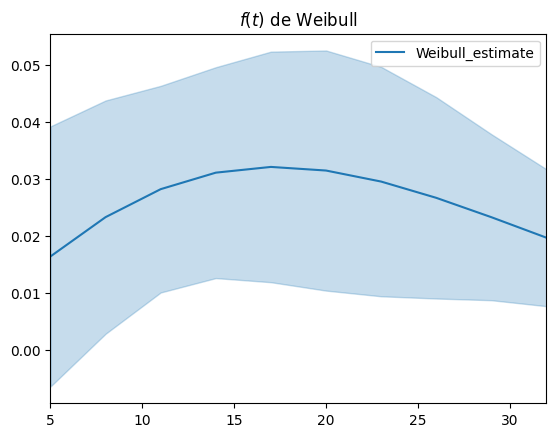

In [31]:
## f(t)
mweibull.plot_density()
plt.title('$f(t)$ de Weibull')
plt.xlim(mint, maxt);

# Log Normal

Suponiendo que el log tiempo de superviviencia se distribuye normal

In [33]:
mlogn = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

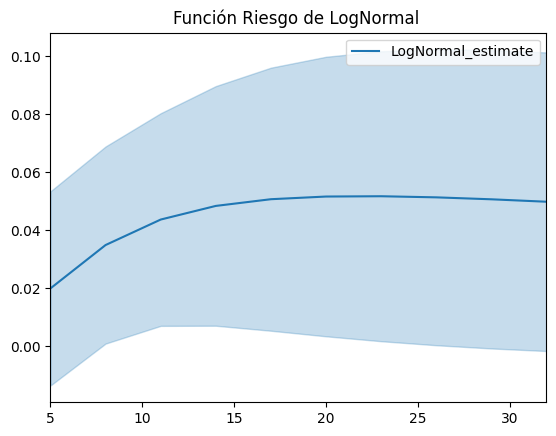

In [34]:
# Riesgo
mlogn.plot_hazard()
plt.title('Función Riesgo de LogNormal ')
plt.xlim(mint, maxt);

In [35]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850
